In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns
sns.set()

## Parametric Statistical Hypothesis Tests

### Student’s t-test
Tests whether the means of two independent samples are significantly different.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.


Interpretation

* H0: the means of the samples are equal.
* H1: the means of the samples are unequal

In [ ]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]

stat, p = ttest_ind(data1, data2)

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('the means of the samples are equal (H0).')
else:
    print('the means of the samples are unequal (H1)')

stat=-0.326, p=0.748
the means of the samples are equal (H0).


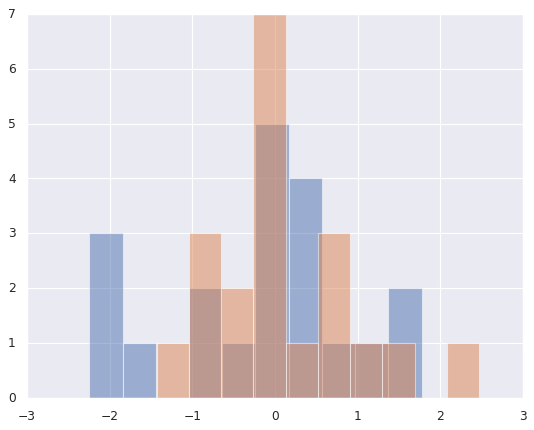

In [ ]:
gauss = np.random.multivariate_normal([0, 0.1], [[1, 0], [0, 1]], size=20)
gauss = pd.DataFrame(gauss, columns=['x', 'y'])

for col in 'xy':
    plt.hist(gauss[col], alpha=0.5)

In [ ]:
stat, p = ttest_ind(gauss.x, gauss.y)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-0.838, p=0.407
Probably the same distribution


In [ ]:
n, p = 10, .5  # number of trials, probability of each trial
binom = np.random.binomial(n, p, 1000)

### Paired Student’s t-test
Tests whether the means of two paired samples are significantly different.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.
* Observations across each sample are paired.

Interpretation

* H0: the means of the samples are equal.
* H1: the means of the samples are unequal.

In [ ]:
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-0.334, p=0.746
Probably the same distribution


In [ ]:
stat, p = ttest_rel(gauss.x, gauss.y)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-0.885, p=0.387
Probably the same distribution


## Normality Tests

### Shapiro-Wilk Test
Tests whether a data sample has a Gaussian distribution.

Assumptions

* Observations in each sample are independent and identically distributed (iid).


Interpretation

* H0: the sample has a Gaussian distribution.
* H1: the sample does not have a Gaussian distribution.

In [ ]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


In [ ]:
stat, p = shapiro(gauss.y)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print(' the sample has a Gaussian distribution')
else:
    print('the sample does not have a Gaussian distribution')

stat=0.953, p=0.423
 the sample has a Gaussian distribution


### D’Agostino’s K^2 Test
Tests whether a data sample has a Gaussian distribution.

Assumptions

* Observations in each sample are independent and identically distributed (iid).

Interpretation

* H0: the sample has a Gaussian distribution.
* H1: the sample does not have a Gaussian distribution.

In [ ]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=3.392, p=0.183
Probably Gaussian


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Anderson-Darling Test
Tests whether a data sample has a Gaussian distribution.

Assumptions

* Observations in each sample are independent and identically distributed (iid).

Interpretation

* H0: the sample has a Gaussian distribution.
* H1: the sample does not have a Gaussian distribution.


In [ ]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.424
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


## Independent tests

## Pearson’s Correlation Coefficient
Tests whether two samples have a linear relationship.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.

Interpretation

* H0: the two samples are independent.
* H1: there is a dependency between the samples.

In [ ]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.01:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.688, p=0.028
Probably independent


In [ ]:
gauss = np.random.multivariate_normal([0, 0.1], [[1, 0], [0, 1]], size=2000)
gauss = pd.DataFrame(gauss, columns=['x', 'y'])

In [ ]:
gauss.y = gauss.x * gauss.x

In [ ]:
stat, p = pearsonr(gauss.x, gauss.y)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.5:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.096, p=0.000
Probably dependent


## Spearman’s Rank Correlation
Tests whether two samples have a monotonic relationship.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.

Interpretation

* H0: the two samples are independent.
* H1: there is a dependency between the samples.

In [ ]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.855, p=0.002
Probably dependent


### Kendall’s Rank Correlation
Tests whether two samples have a monotonic relationship.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.

Interpretation

* H0: the two samples are independent.
* H1: there is a dependency between the samples.

In [ ]:
# Example of the Kendall's Rank Correlation Test
from scipy.stats import kendalltau
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.733, p=0.002
Probably dependent


### Chi-Squared Test
Tests whether two categorical variables are related or independent.

Assumptions

* Observations used in the calculation of the contingency table are independent.
* 25 or more examples in each cell of the contingency table.

Interpretation

* H0: the two samples are independent.
* H1: there is a dependency between the samples.

In [ ]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = [[10, 20, 30],[6,  9,  17]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.272, p=0.873
Probably independent


## Nonparametric Statistical Hypothesis Tests

## Mann-Whitney U Test
Tests whether the distributions of two independent samples are equal or not.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.

Interpretation

* H0: the distributions of both samples are equal.
* H1: the distributions of both samples are not equal.

In [ ]:
# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=40.000, p=0.473
Probably the same distribution


### Wilcoxon Signed-Rank Test
Tests whether the distributions of two paired samples are equal or not.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.
* Observations across each sample are paired.

Interpretation

* H0: the distributions of both samples are equal.
* H1: the distributions of both samples are not equal.

In [ ]:
# Example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=21.000, p=0.557
Probably the same distribution


### Kruskal-Wallis H Test
Tests whether the distributions of two or more independent samples are equal or not.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.

Interpretation

* H0: the distributions of all samples are equal.
* H1: the distributions of one or more samples are not equal.

In [ ]:
# Example of the Kruskal-Wallis H Test
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.571, p=0.450
Probably the same distribution


### Friedman Test
Tests whether the distributions of two or more paired samples are equal or not.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.
* Observations across each sample are paired.

Interpretation

* H0: the distributions of all samples are equal.
* H1: the distributions of one or more samples are not equal.

In [ ]:
# Example of the Friedman Test
from scipy.stats import friedmanchisquare
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.800, p=0.670
Probably the same distribution
